In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import plotly.express as px
import seaborn as sns
from ipwhois import IPWhois

In [4]:
df = pd.read_csv('Data_2.csv')

columns = ['Type', 'sflow_agent_address', 'inputPort', 'outputPort', 'src_Mac', 'dst_Mac', 'ethernet_type', 'in_vlan',
           'out_vlan', 'src_IP', 'dst_IP', 'IP_protocol', 'ip_tos', 'ip_ttl', 'udp_src_port/tcp_src_port/icmp_type',
           'udp_dst_port/tcp_dst_port/icmp_code', 'tcp_flags', 'packet_size', 'IP_size', 'sampling_rate']

df.columns = columns

df = df.drop(columns=['Type'])

# Convert relevant columns to numeric types
numeric_columns = ['inputPort', 'outputPort', 'in_vlan', 'out_vlan', 'IP_protocol', 'ip_ttl', 'udp_src_port/tcp_src_port/icmp_type',
           'udp_dst_port/tcp_dst_port/icmp_code', 'packet_size', 'IP_size', 'sampling_rate' ]

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check for missing values
display(df.isnull().sum())

# Display basic statistics
display(df)

sflow_agent_address                    0
inputPort                              0
outputPort                             0
src_Mac                                0
dst_Mac                                0
ethernet_type                          0
in_vlan                                0
out_vlan                               0
src_IP                                 0
dst_IP                                 0
IP_protocol                            0
ip_tos                                 0
ip_ttl                                 0
udp_src_port/tcp_src_port/icmp_type    0
udp_dst_port/tcp_dst_port/icmp_code    0
tcp_flags                              0
packet_size                            0
IP_size                                0
sampling_rate                          0
dtype: int64

,sflow_agent_address,inputPort,outputPort,src_Mac,dst_Mac,ethernet_type,in_vlan,out_vlan,src_IP,dst_IP,IP_protocol,ip_tos,ip_ttl,udp_src_port/tcp_src_port/icmp_type,udp_dst_port/tcp_dst_port/icmp_code,tcp_flags,packet_size,IP_size,sampling_rate
0,203.30.38.251,193,130,0031466b23cf,00239cd087c1,0x0800,919.0,919,173.194.22.215,137.132.228.29,6,0x00,63,443.0,39740,0x10,1438,1420,2048
1,203.30.38.251,199,131,544b8cf9a7df,001cb0c88e40,0x0800,600.0,43,193.62.193.9,202.130.56.153,6,0x00,246,80.0,35794,0x18,272,250,2048
2,203.30.38.251,193,131,0031466b23cf,001cb0c88e40,0x0800,919.0,43,74.125.130.132,192.122.131.33,6,0x00,52,443.0,5287,0x10,1418,1400,2048
3,203.30.38.251,129,193,00135f21bc80,0031466b23cf,0x0800,11.0,919,155.69.160.69,74.125.68.139,17,0x60,59,48361.0,443,0x00,89,67,2048
4,203.30.38.251,135,129,002688cd5fc7,00135f21bc80,0x0800,919.0,11,54.230.159.64,155.69.191.254,6,0x00,251,443.0,16657,0x10,1418,1400,2048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177226,203.30.38.251,193,131,0031466b23cf,001cb0c88e40,0x0800,919.0,43,74.125.10.23,192.122.131.146,6,0x00,63,443.0,50177,0x10,1490,1472,2048
177227,203.30.38.251,200,199,80711fc76001,ccef48570144,0x0800,4095.0,601,13.107.4.50,210.48.222.13,6,0x00,112,80.0,50771,0x10,1448,1426,2048
177228,203.30.38.251,200,131,80711fc76001,001cb0c88e40,0x0800,280.0,43,171.67.77.19,192.122.131.36,6,0x00,56,80.0,10452,0x10,1522,1500,2048
177229,203.30.38.251,199,129,544b8cf9a7df,00135f21bc80,0x0800,600.0,11,133.11.245.204,155.69.59.240,17,0x00,55,50553.0,4500,0x10,150,128,2048


EXERCISE 4A: TOP TALKERS AND LISTENERS

In [5]:
# Find the top 5 Talkers
top_talkers = df['src_IP'].value_counts().head(5).reset_index()
top_talkers.columns = ['IP Address', '# of Packets']

# Find the top 5 Listeners
top_listeners = df['dst_IP'].value_counts().head(5).reset_index()
top_listeners.columns = ['IP Address', '# of Packets']

# Find organization names for top talkers and listeners
def get_org_name(ip):
    try:
        obj = IPWhois(ip)
        res = obj.lookup_rdap()
        return res.get('asn_description', 'N/A')
    except Exception as e:
        return 'Unknown'
    
top_talkers['Organization'] = top_talkers['IP Address'].apply(get_org_name)
top_listeners['Organization'] = top_listeners['IP Address'].apply(get_org_name)

display(top_talkers)
display(top_listeners)

,IP Address,# of Packets,Organization
0,13.107.4.50,5960,"MICROSOFT-CORP-MSN-AS-BLOCK, US"
1,130.14.250.7,4034,"NLM-GW, US"
2,155.69.160.38,3866,"NTU-AS-AP Nanyang Technological University, SG"
3,171.67.77.19,2656,"STANFORD, US"
4,155.69.199.255,2587,"NTU-AS-AP Nanyang Technological University, SG"


,IP Address,# of Packets,Organization
0,137.132.228.33,5908,"NUS-AS-AP NUS Information Technology, SG"
1,192.122.131.36,4662,"A-STAR-AS-AP A-STAR, SG"
2,202.51.247.133,4288,"NUS-GP-AS-AP NUS Gigapop, SG"
3,137.132.228.29,4022,"NUS-AS-AP NUS Information Technology, SG"
4,103.37.198.100,3741,"A-STAR-AS-AP A-STAR, SG"


EXERCISE 4B: TRANSPORT PROTOCOL

In [6]:
# Calculate protocol distribution
all_protocols_counts = df['IP_protocol'].value_counts().reset_index()
all_protocols_counts.columns = ['Header value', '# of Packets']

# Map protocol numbers to names
protocol_map = {
    0: 'HOPOPT',
    1: 'ICMP',
    2: 'IGMP',
    6: 'TCP',
    17: 'UDP',
    41: 'IPv6',
    47: 'GRE',
    50: 'ESP',
    58: 'ICMPv6'
}
all_protocols_counts['Transport layer protocol'] = all_protocols_counts['Header value'].map(protocol_map)

# Calculate proportions
total_packets = all_protocols_counts['# of Packets'].sum()
all_protocols_counts['Proportion(%)'] = (all_protocols_counts['# of Packets'] / total_packets * 100).round(5)

# Assign protocol names
all_protocols_counts = all_protocols_counts[['Header value', 'Transport layer protocol', '# of Packets', 'Proportion(%)']]

display(all_protocols_counts)

,Header value,Transport layer protocol,# of Packets,Proportion(%)
0,6,TCP,137707,77.69916
1,17,UDP,36851,20.79264
2,0,HOPOPT,1216,0.68611
3,50,ESP,718,0.40512
4,47,GRE,664,0.37465
5,1,ICMP,60,0.03385
6,58,ICMPv6,10,0.00564
7,41,IPv6,3,0.00169
8,2,IGMP,2,0.00113


EXERCISE 4C: APPLICATIONS PROTOCOL

In [7]:
# Find the top 5 applications by port number
top_applications = df['udp_dst_port/tcp_dst_port/icmp_code'].value_counts().head(5).reset_index()
top_applications.columns = ['Destination IP Port Number', '# of Packets']

# Find Service names for top applications
Service_map = {
    20: 'FTP',
    21: 'FTP',
    22: 'SSH',
    23: 'Telnet',
    25: 'SMTP',
    53: 'DNS',
    67: 'DHCP',
    68: 'DHCP',
    80: 'HTTP',
    110: 'POP3',
    143: 'IMAP',
    443: 'HTTPS',
    8160: 'BMC Patrol',
    15000: 'hydap'
}
top_applications['Service'] = top_applications['Destination IP Port Number'].map(Service_map).fillna('Unknown')

# Display top applications
display(top_applications)

,Destination IP Port Number,# of Packets,Service
0,443,43208,HTTPS
1,80,11018,HTTP
2,50930,2450,Unknown
3,15000,2103,hydap
4,8160,1354,BMC Patrol


EXERCISE 4D: TRAFFIC

In [8]:
# Calculate total traffic
total_traffic = df['IP_size'].sum()
sampling_rate = df['sampling_rate']

estimated_total_traffic = total_traffic * sampling_rate.iloc[0]

# Convert to MB
bytes_in_mb = 1024 * 1024
estimated_total_traffic_mb = estimated_total_traffic / bytes_in_mb

# Display estimated total traffic
display(f"Estimated Total Traffic: {estimated_total_traffic_mb:.2f} MB")

'Estimated Total Traffic: 331901.12 MB'

EXERCISE 4E: ADDITIONAL ANALYSIS
Top 5 Communication Pair

In [9]:
# Find the top 5 communication pairs
df['Communication Pair'] = df['src_IP'] + ' -> ' + df['dst_IP']
top_communication_pairs = df['Communication Pair'].value_counts().head(5).reset_index()

top_communication_pairs.columns = ['Communication Pair', '# of Packets']
display(top_communication_pairs)

,Communication Pair,# of Packets
0,130.14.250.7 -> 103.37.198.100,3739
1,171.67.77.19 -> 192.122.131.36,2656
2,129.99.230.54 -> 137.132.22.74,2097
3,137.132.228.42 -> 137.131.17.212,1553
4,155.69.252.133 -> 138.75.242.36,1475


EXERCISE 4E: ADDITIONAL ANALYSIS
Visualizing the communication between different IP hosts

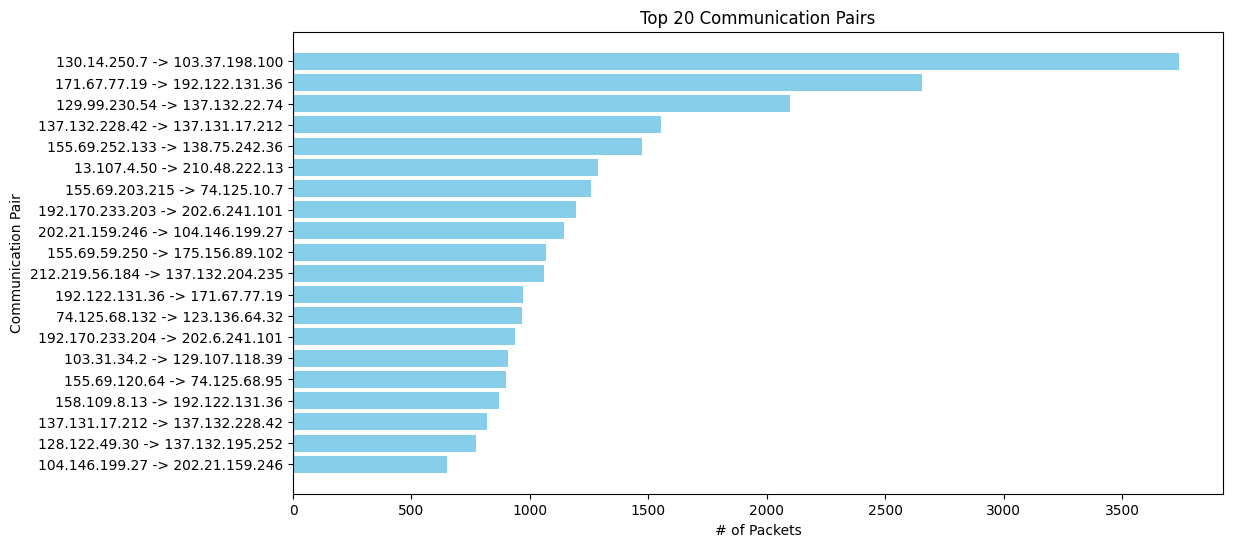

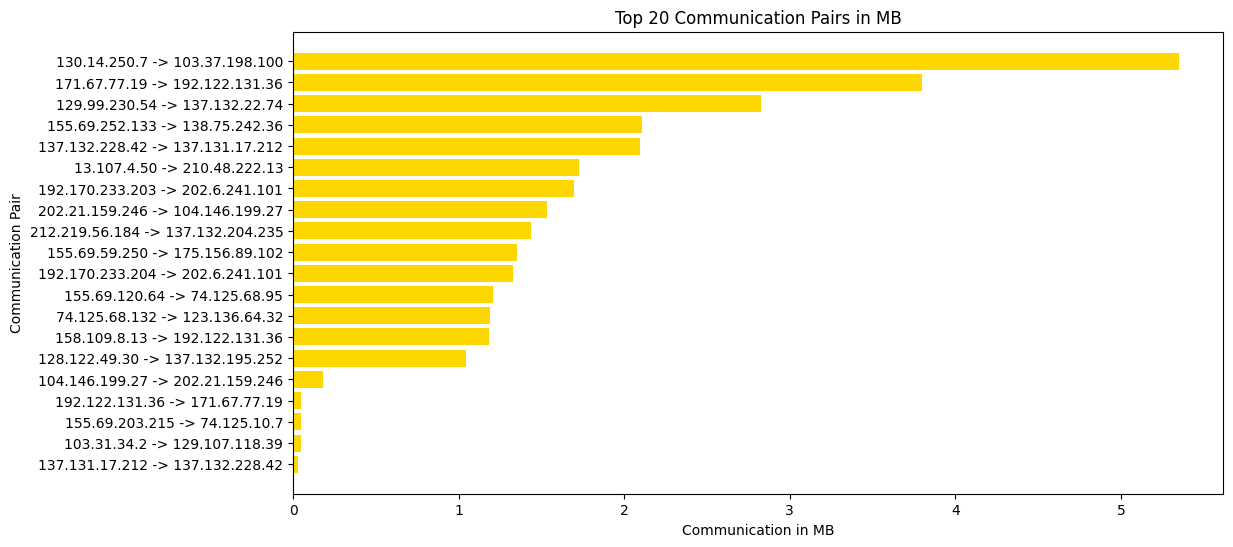

In [20]:
# Visualizations of communications between different IP hosts

# Bar Chart for top 20 communication pairs
top_communication_pairs = df['Communication Pair'].value_counts().head(20).reset_index()
top_communication_pairs.columns = ['Communication Pair', '# of Packets']
plt.figure(figsize=(12,6))
plt.barh(top_communication_pairs['Communication Pair'], top_communication_pairs['# of Packets'], color = 'skyblue')
plt.xlabel('# of Packets')
plt.ylabel('Communication Pair')
plt.title('Top 20 Communication Pairs')
plt.gca().invert_yaxis()
plt.show()

# Convert # of packets to MB
traffic_per_pair = df.groupby('Communication Pair')['IP_size'].sum().reset_index()
traffic_per_pair['Communication in MB'] = traffic_per_pair['IP_size'] / bytes_in_mb

top_communication_pairs = df['Communication Pair'].value_counts().head(20).reset_index()
top_communication_pairs.columns = ['Communication Pair', '# of Packets']

top_communication_pairs = top_communication_pairs.merge(
    traffic_per_pair[['Communication Pair', 'Communication in MB']], 
    on='Communication Pair', 
    how='left')

# Bar Chart for top 20 communication pairs in MB
top_communication_pairs = top_communication_pairs.sort_values(by='Communication in MB', ascending=False)
plt.figure(figsize=(12,6))
plt.barh(top_communication_pairs['Communication Pair'], top_communication_pairs['Communication in MB'], color = 'gold')
plt.xlabel('Communication in MB')
plt.ylabel('Communication Pair')
plt.title('Top 20 Communication Pairs in MB')
plt.gca().invert_yaxis()
plt.show()

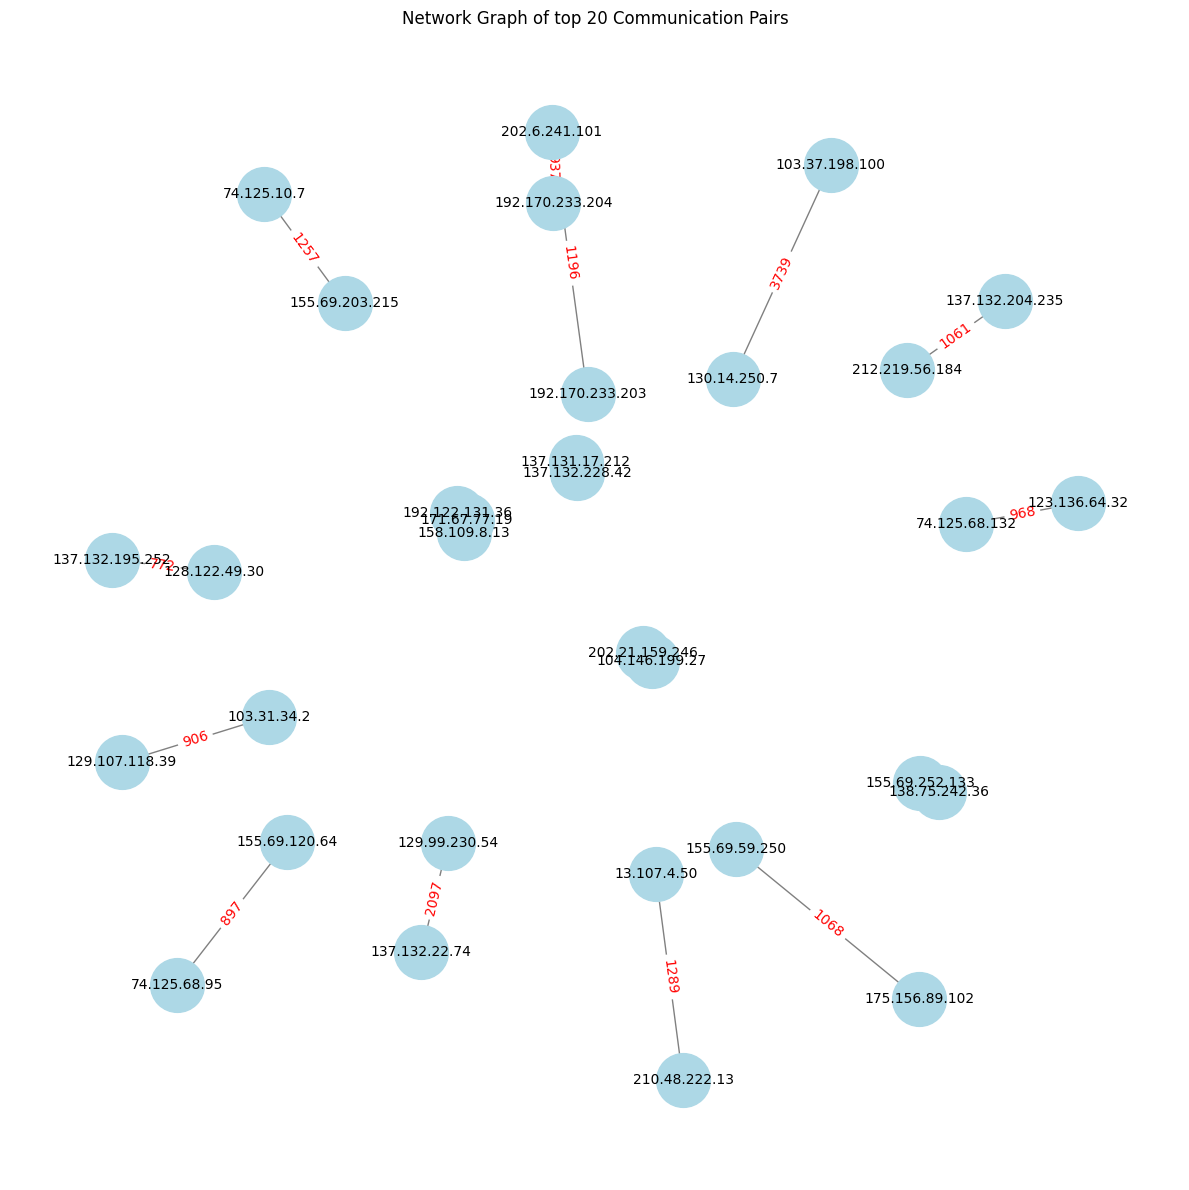

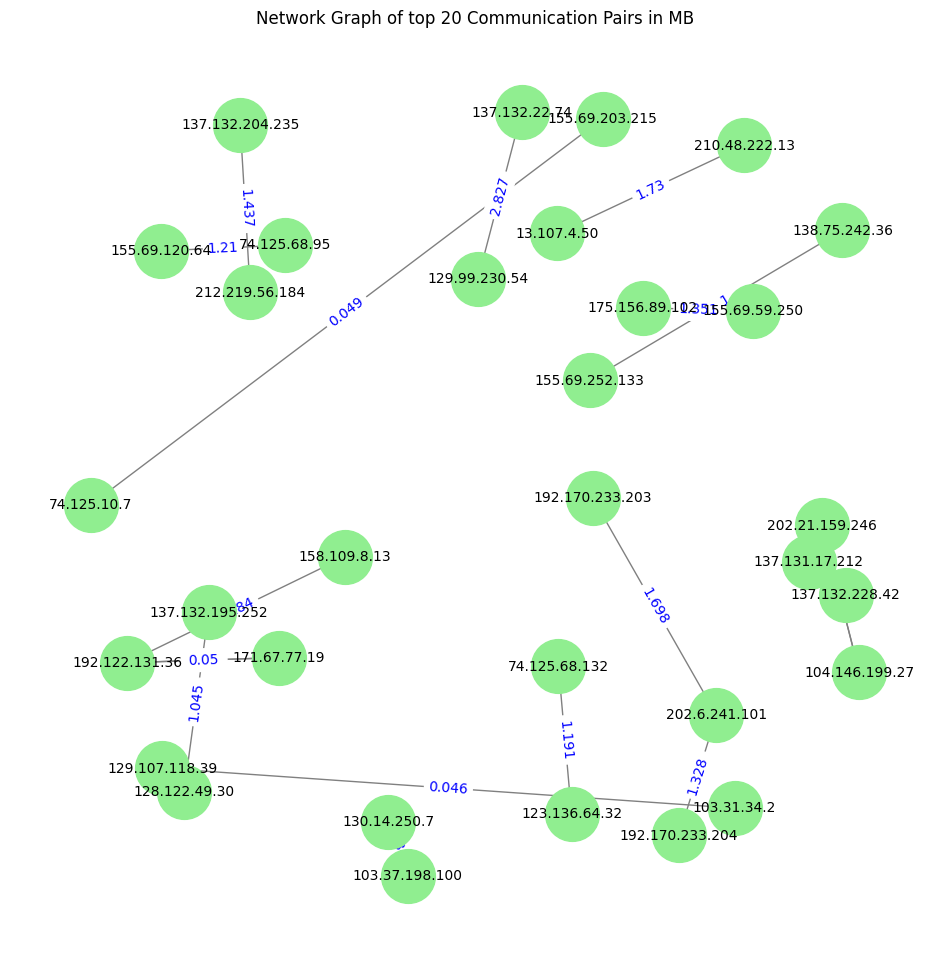

In [50]:
# Network Graph for top 20 communication pairs
top_communication_pairs = df['Communication Pair'].value_counts().head(20).reset_index()
top_communication_pairs.columns = ['Communication Pair', '# of Packets']

G = nx.DiGraph()
pairs = top_communication_pairs.to_dict('records')

for rows in pairs:
    src, dst = rows['Communication Pair'].split(' -> ')
    weight = rows['# of Packets']
    G.add_edge(src, dst, weight=weight)
    
pos = nx.spring_layout(G, k=0.3, iterations=20)
plt.figure(figsize=(12,12))

nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='lightblue')
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title('Network Graph of top 20 Communication Pairs')
plt.axis('off')
plt.tight_layout()
plt.show()

# Convert # of packets to MB
traffic_per_pair = df.groupby('Communication Pair')['IP_size'].sum().reset_index()
traffic_per_pair['Communication in MB'] = (traffic_per_pair['IP_size'] / bytes_in_mb).round(3)

top_communication_pairs = df['Communication Pair'].value_counts().head(20).reset_index()
top_communication_pairs.columns = ['Communication Pair', '# of Packets']

top_communication_pairs = top_communication_pairs.merge(
    traffic_per_pair[['Communication Pair', 'Communication in MB']], 
    on='Communication Pair', 
    how='left')

# Network Graph for top 20 communication pairs in MB
G = nx.DiGraph()
pairs = top_communication_pairs.to_dict('records')

for rows in pairs:
    src, dst = rows['Communication Pair'].split(' -> ')
    weight = rows['Communication in MB']
    G.add_edge(src, dst, weight=weight)
    
pos = nx.spring_layout(G, k=0.3, iterations=20)
plt.figure(figsize=(12,12))

nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='lightgreen')
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='blue')

plt.title('Network Graph of top 20 Communication Pairs in MB')
plt.axis('off')
plt.show()

In [39]:
# Chord Diagram for top 20 communication pairs

top_communication_pairs = df['Communication Pair'].value_counts().head(20).reset_index()
top_communication_pairs.columns = ['Communication Pair', '# of Packets']

fig = px.sunburst(
    top_communication_pairs,
    path=['Communication Pair'],
    values='# of Packets',
    title='Chord Diagram of Top 20 Communication Pairs'
)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

# Convert # of packets to MB
traffic_per_pair = df.groupby('Communication Pair')['IP_size'].sum().reset_index()
traffic_per_pair['Communication in MB'] = (traffic_per_pair['IP_size'] / bytes_in_mb).round(3)

top_communication_pairs = df['Communication Pair'].value_counts().head(20).reset_index()
top_communication_pairs.columns = ['Communication Pair', '# of Packets']

top_communication_pairs = top_communication_pairs.merge(
    traffic_per_pair[['Communication Pair', 'Communication in MB']], 
    on='Communication Pair', 
    how='left')

# Chord Diagram for top 20 communication pairs in MB
fig = px.sunburst(
    top_communication_pairs,
    path=['Communication Pair'],
    values='Communication in MB',
    title='Chord Diagram of Top 20 Communication Pairs in MB'
)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

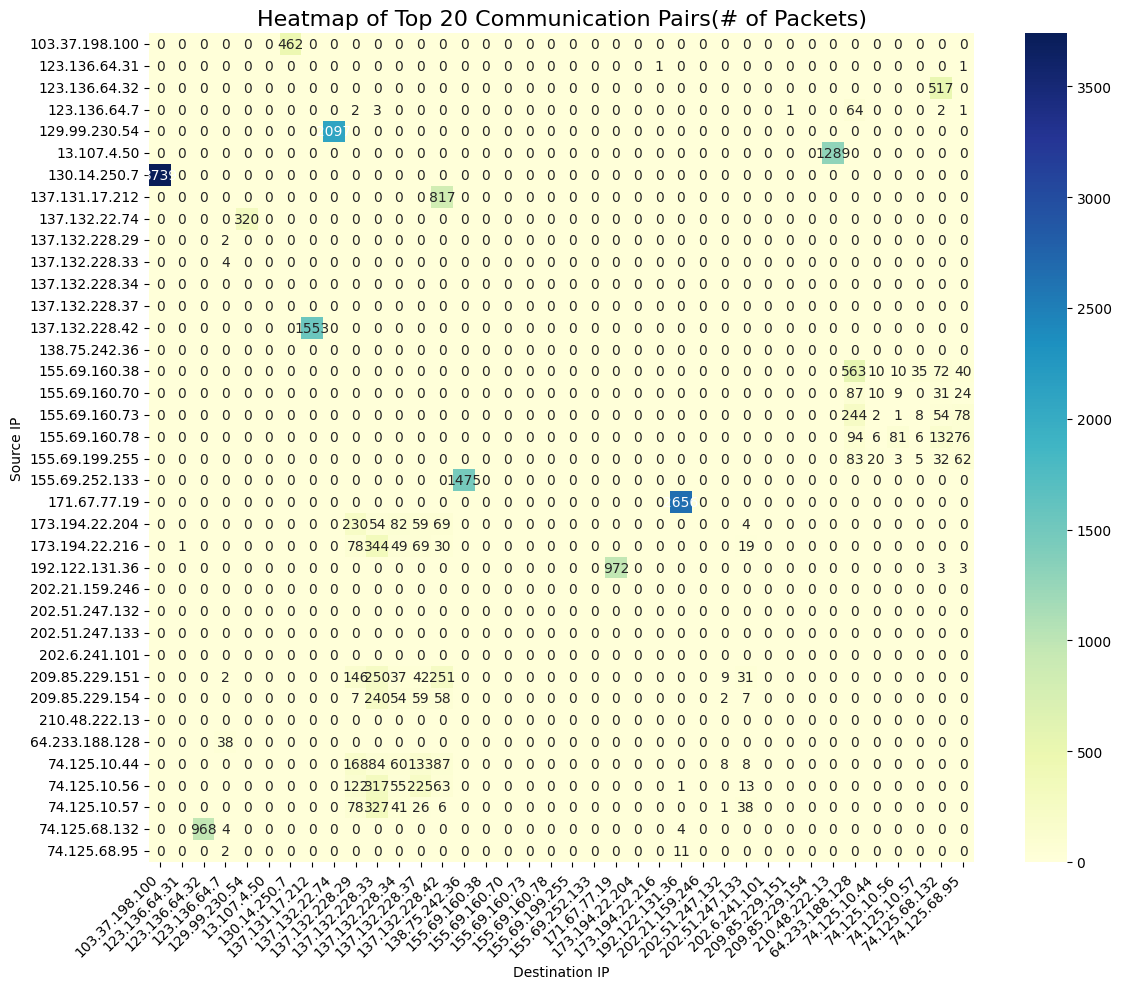

In [47]:
# Heatmap for top 20 communication pairs

common_matrix = df.groupby(['src_IP', 'dst_IP']).size().unstack(fill_value=0)

top_ips = df['src_IP'].value_counts().head(20).index.union(df['dst_IP'].value_counts().head(20).index)
common_matrix = common_matrix.reindex(index=top_ips, columns=top_ips, fill_value=0)

plt.figure(figsize=(12,10))
sns.heatmap(common_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Top 20 Communication Pairs(# of Packets)', fontsize=16)
plt.xlabel('Destination IP')
plt.ylabel('Source IP')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()